<a href="https://colab.research.google.com/github/iMikeJr/Algoritmos_geneticos/blob/main/Algor%C3%ADtmo_gen%C3%A9tico_raices_de_un_polinomio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

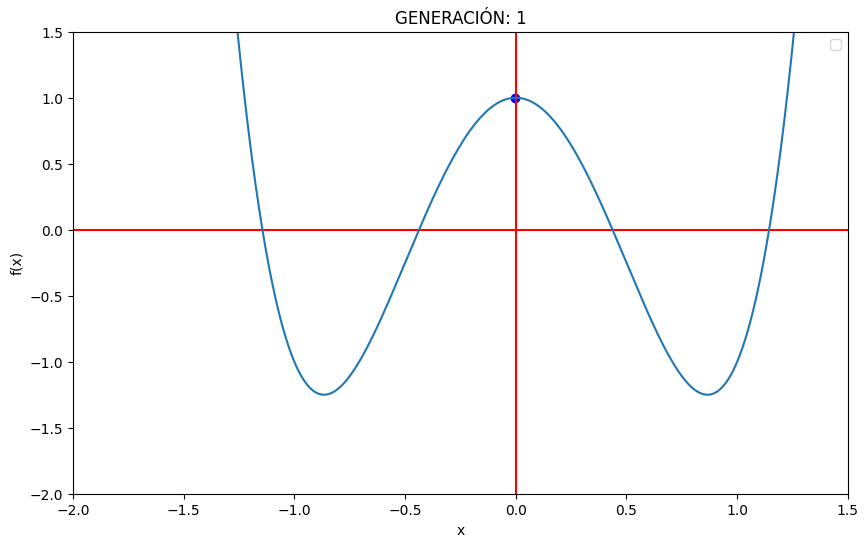

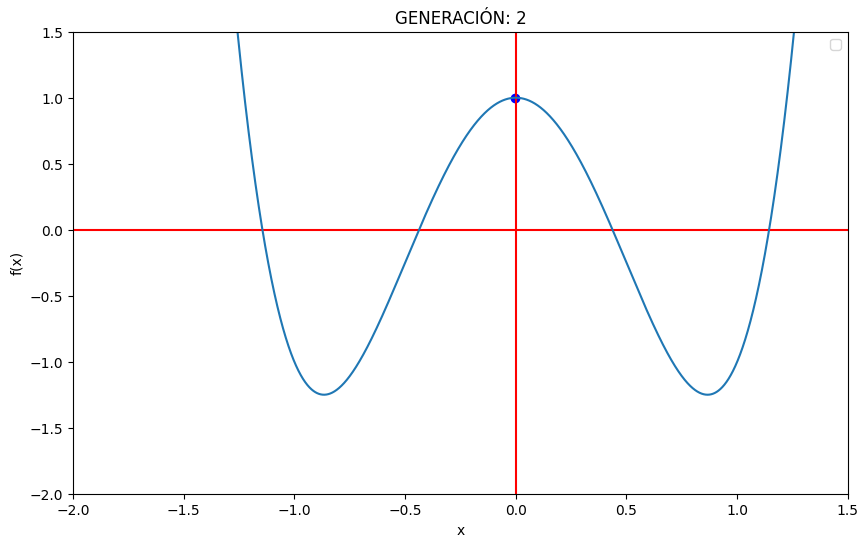

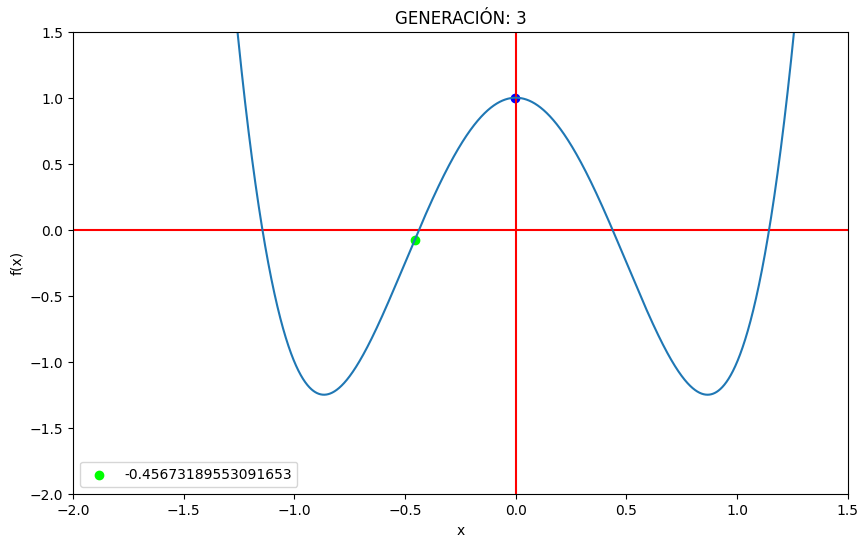

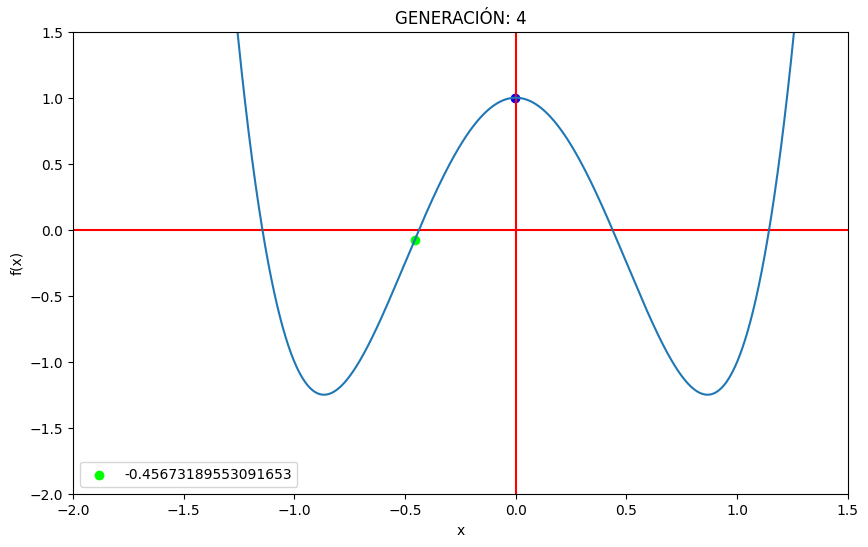

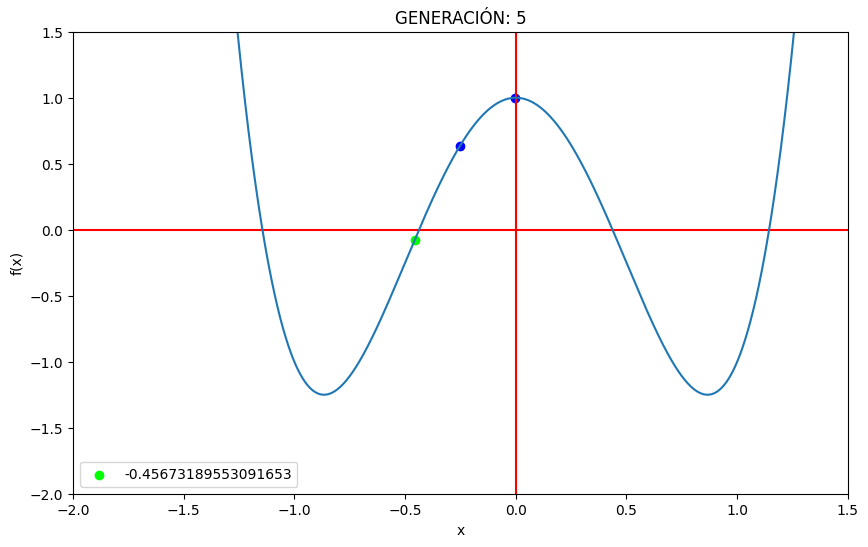

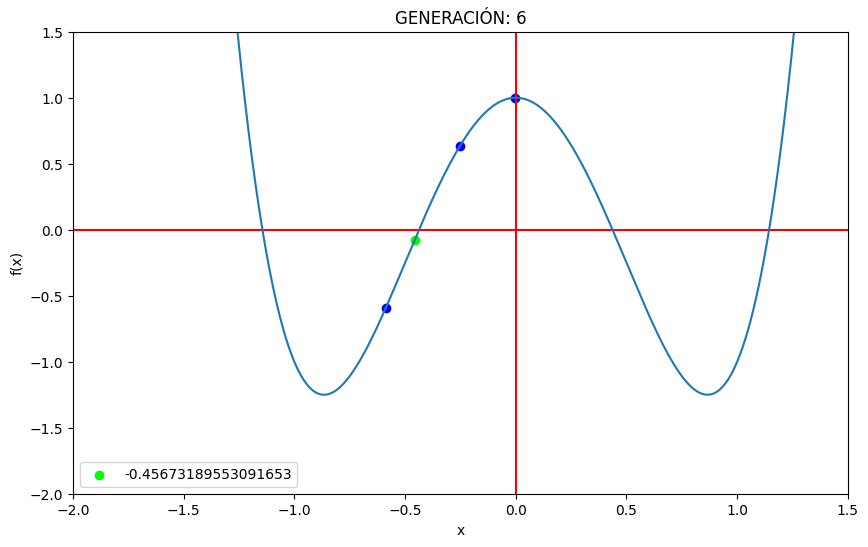

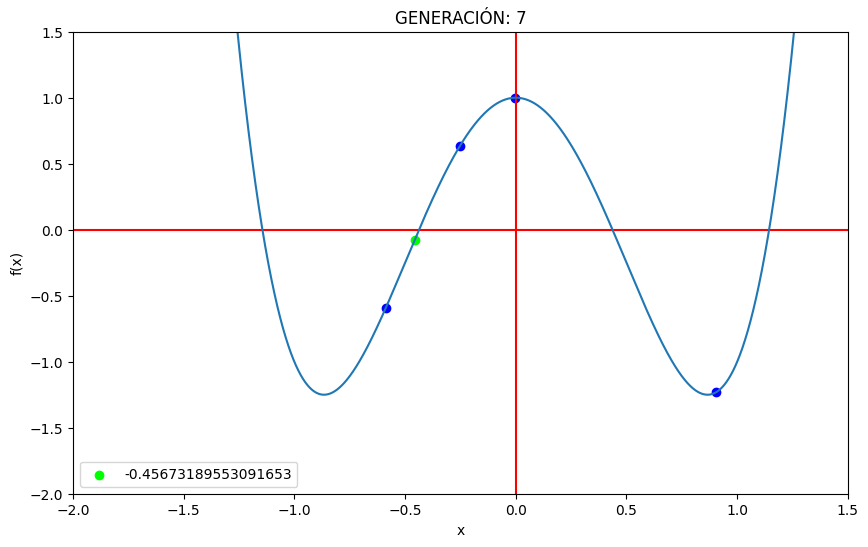

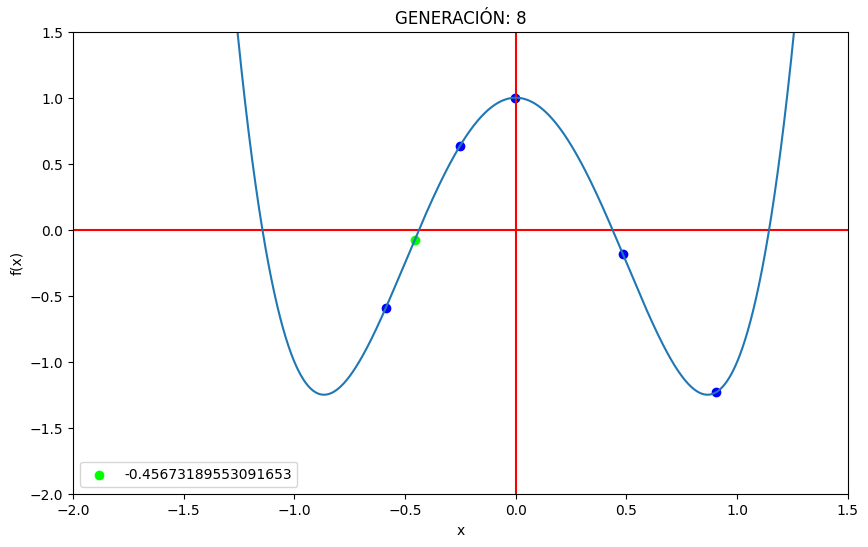

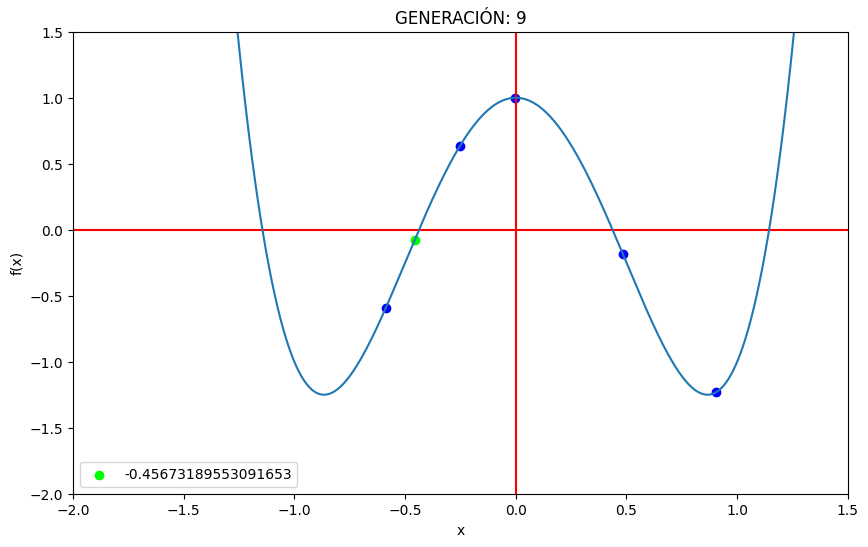

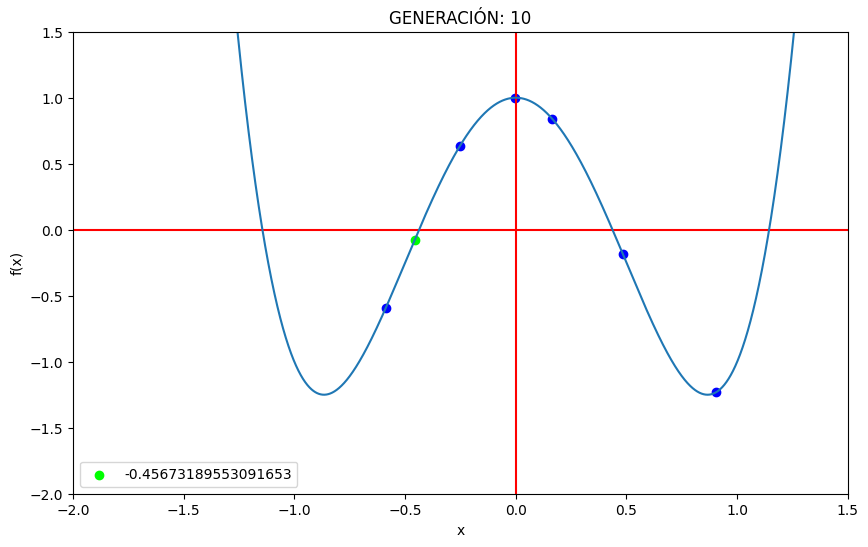

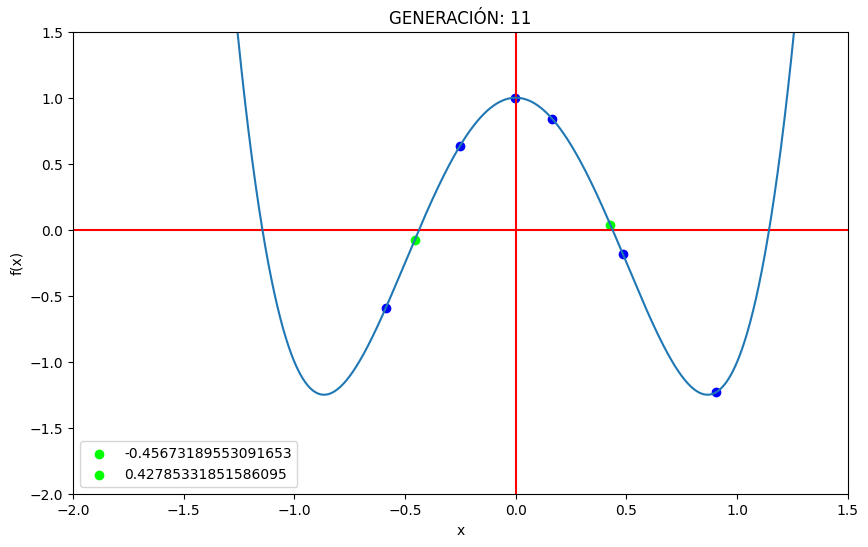

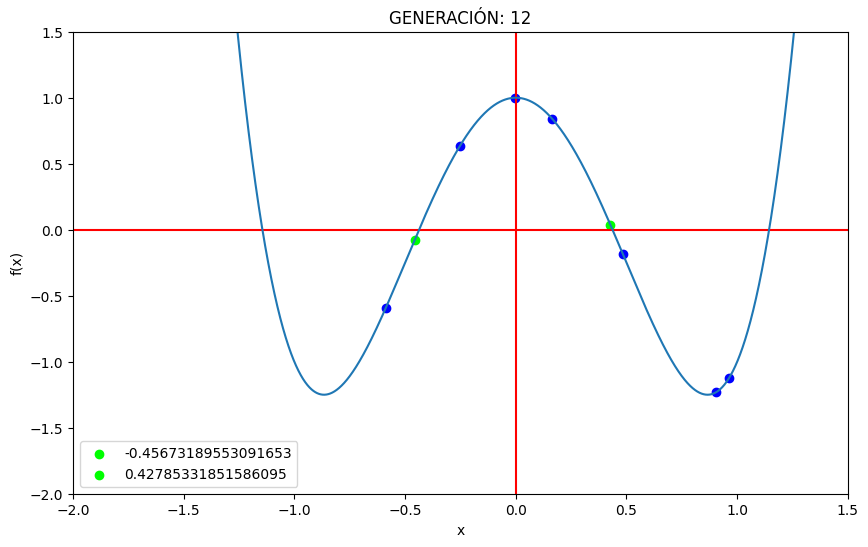

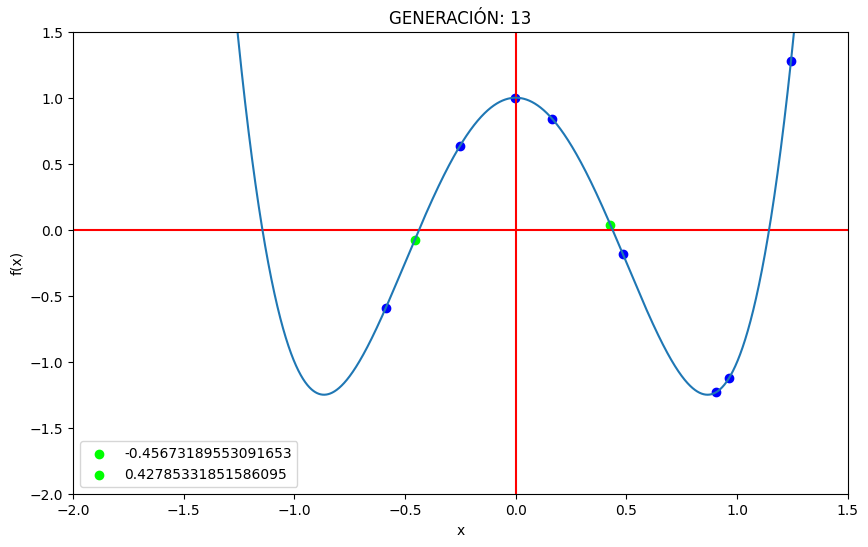

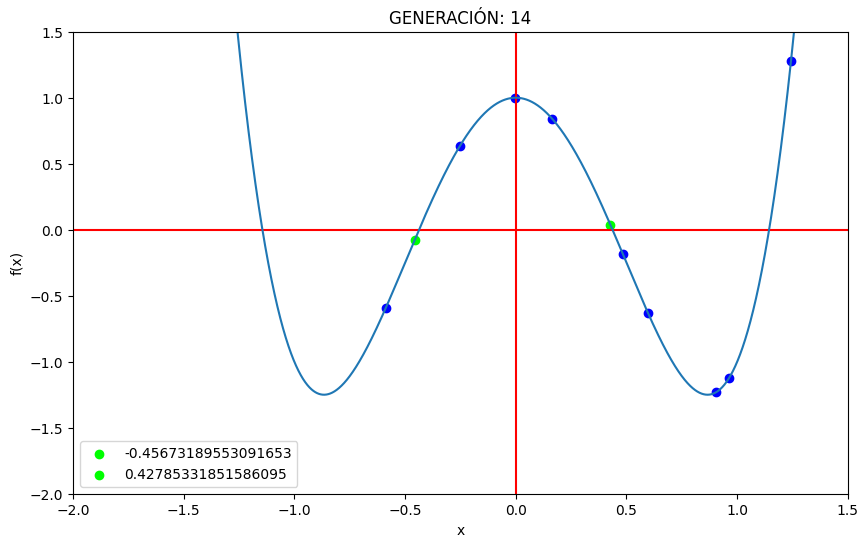

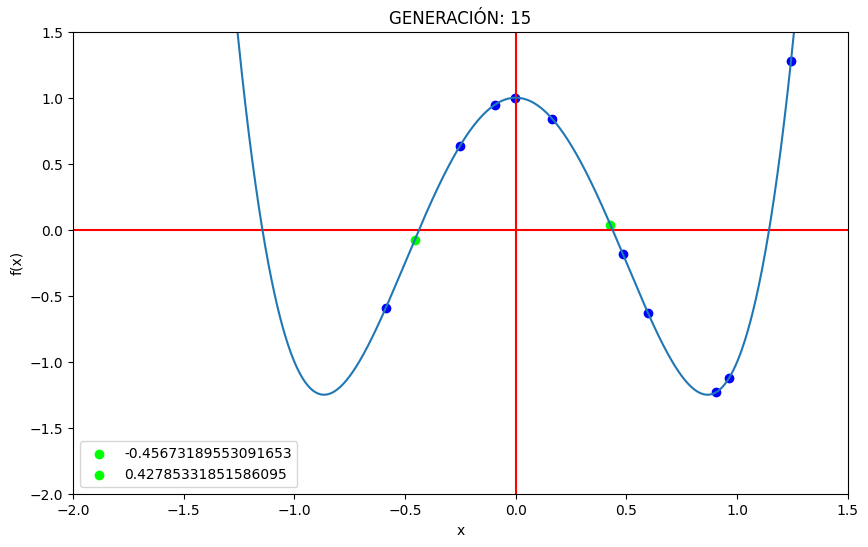

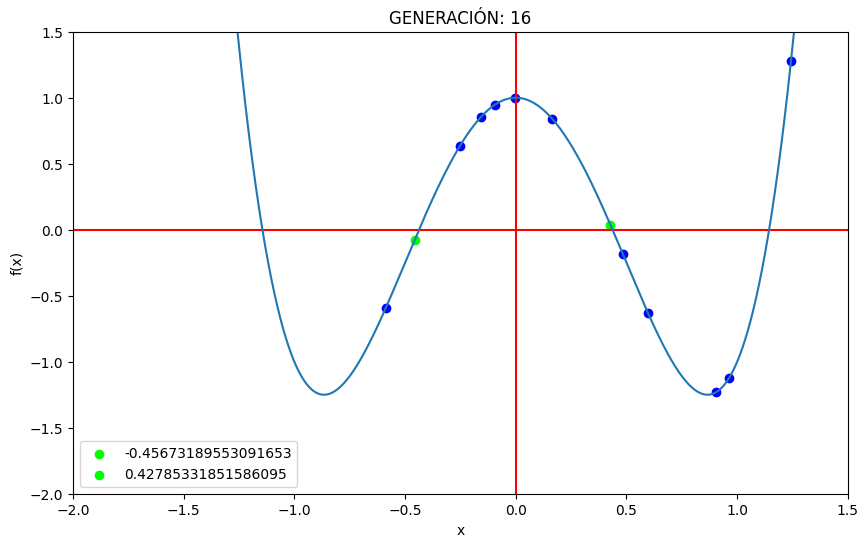

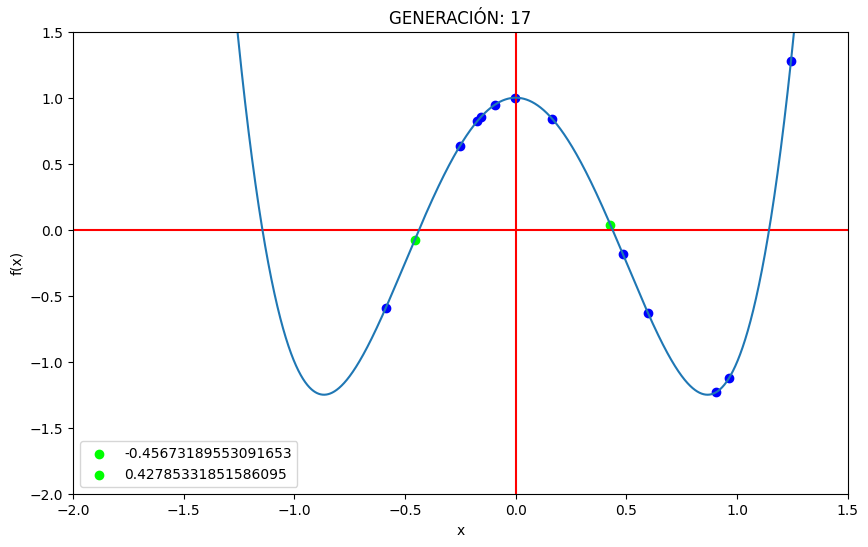

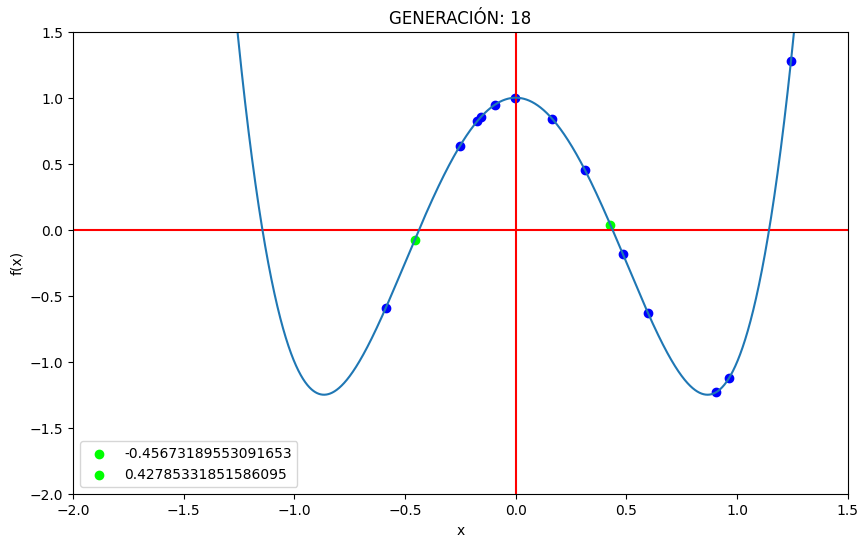

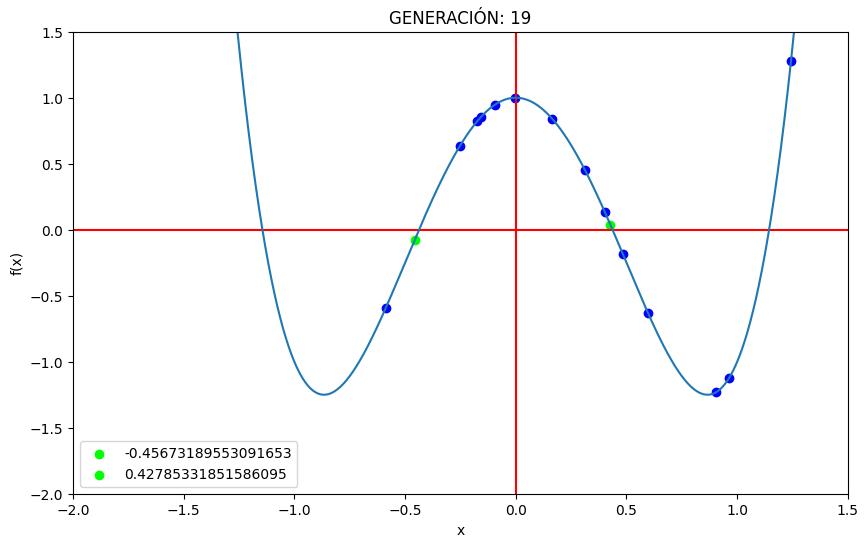

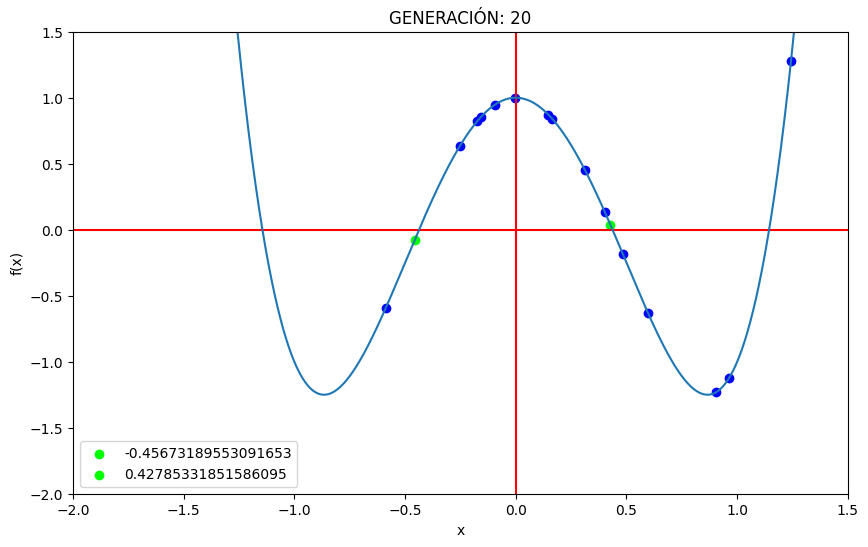

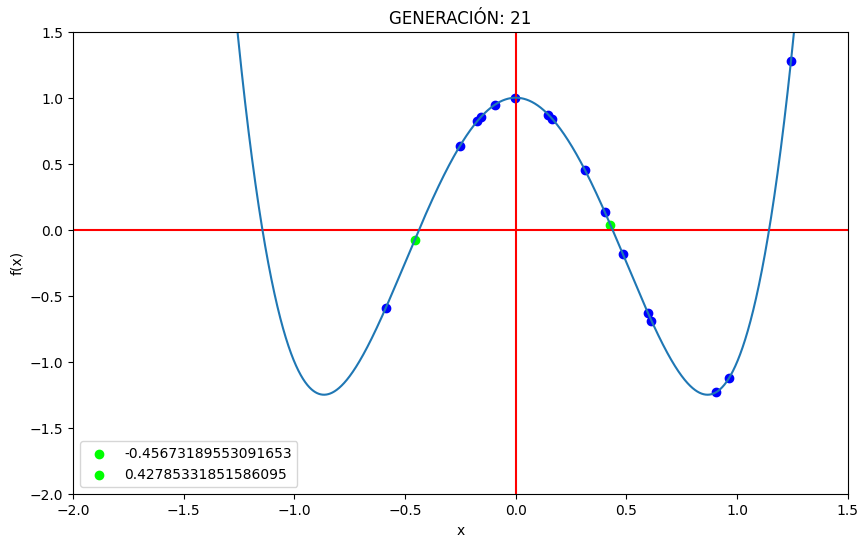

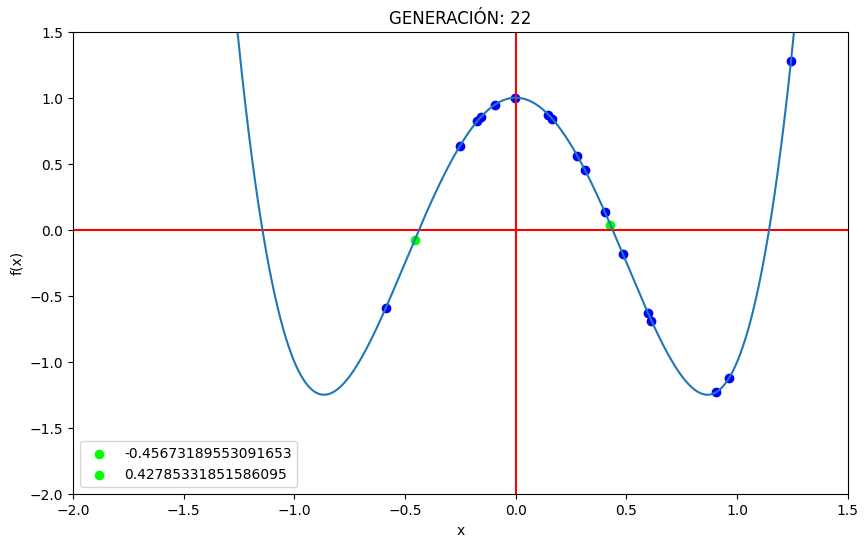

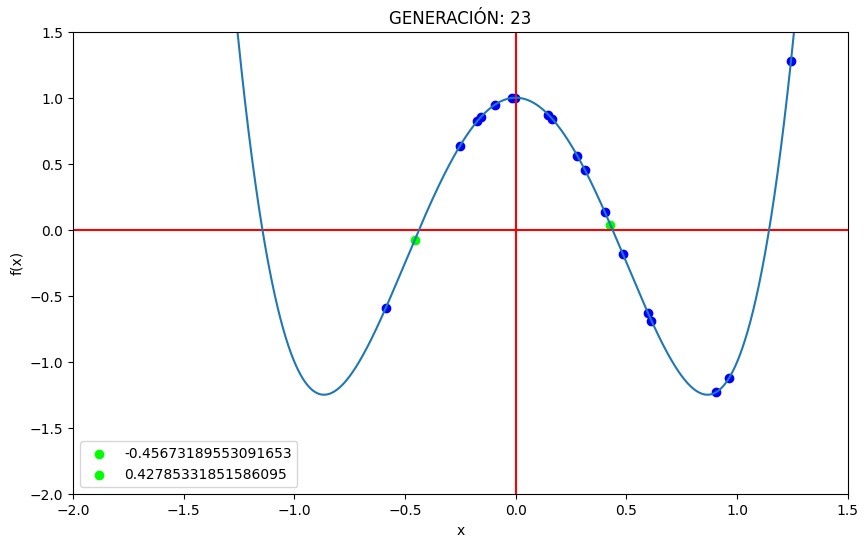

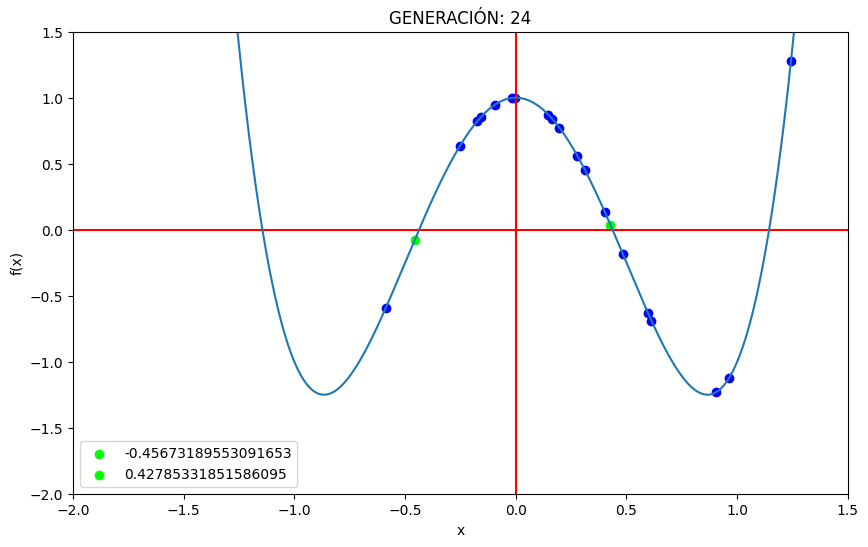

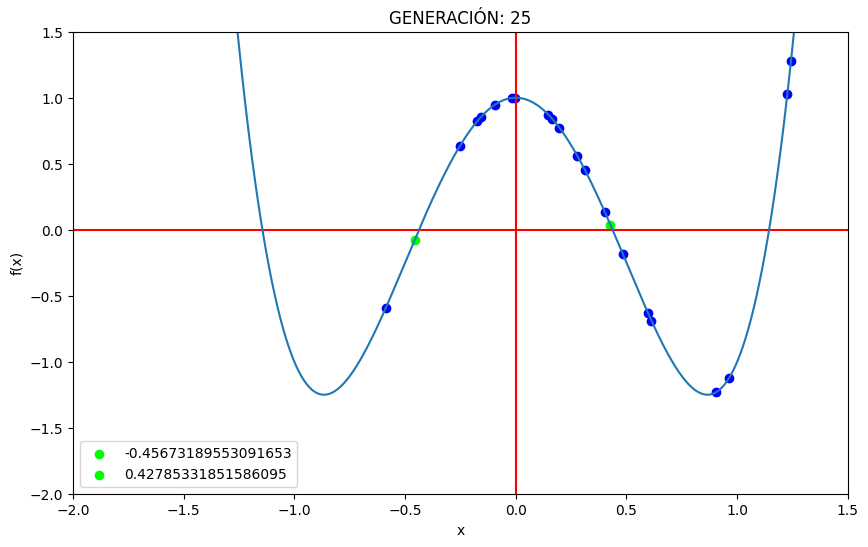

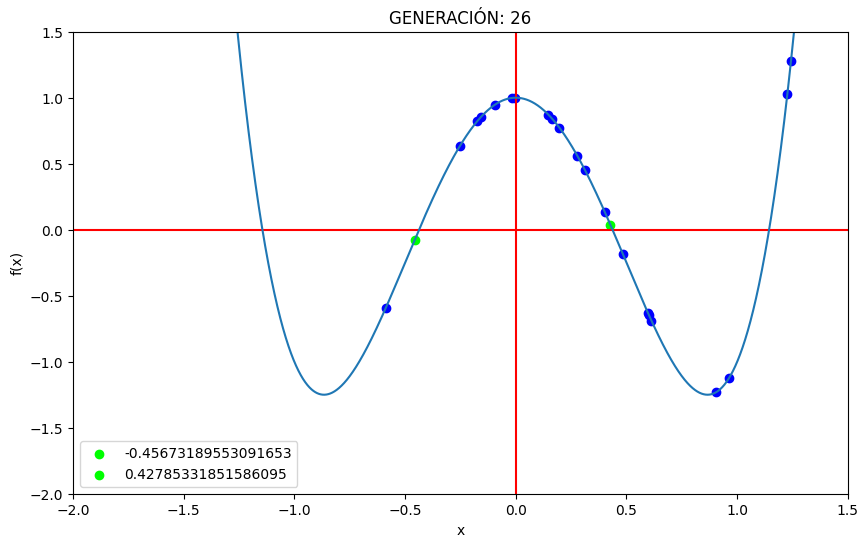

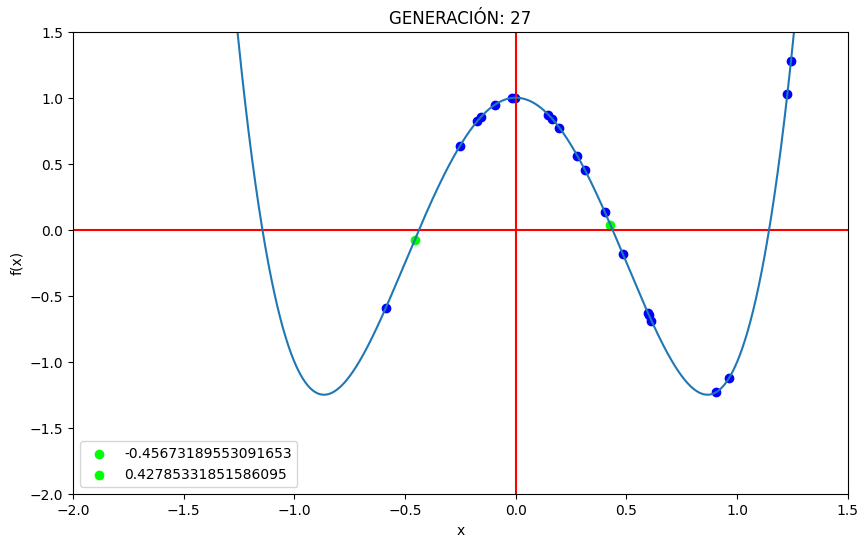

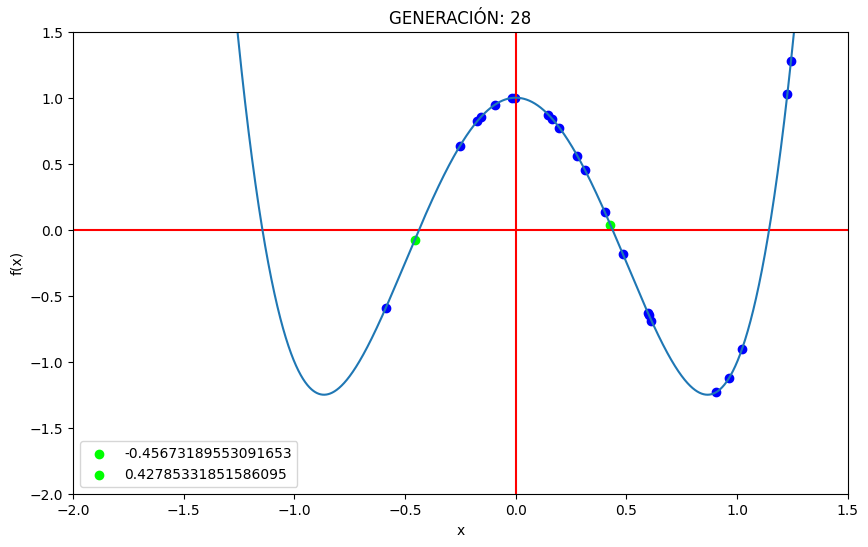

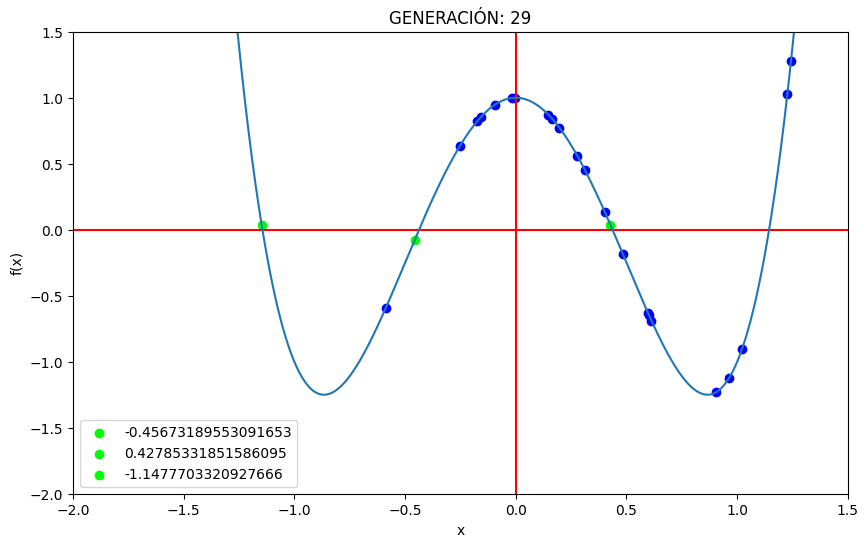

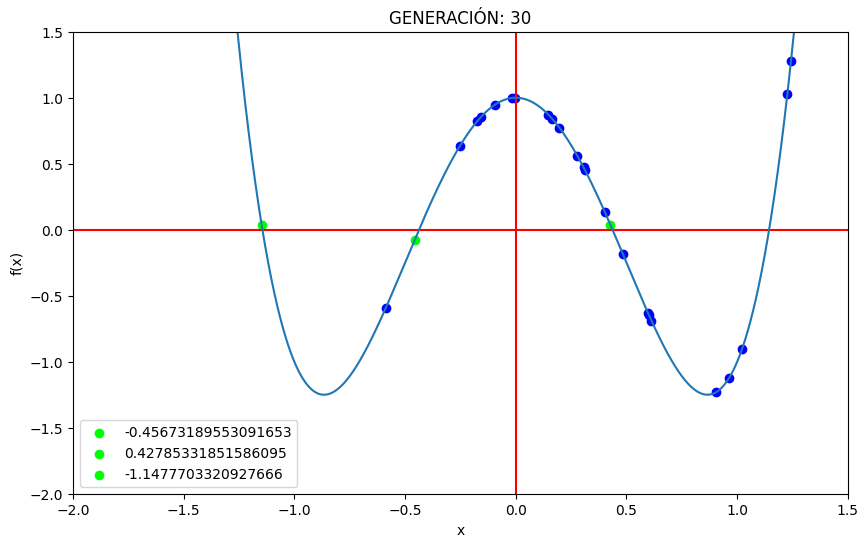

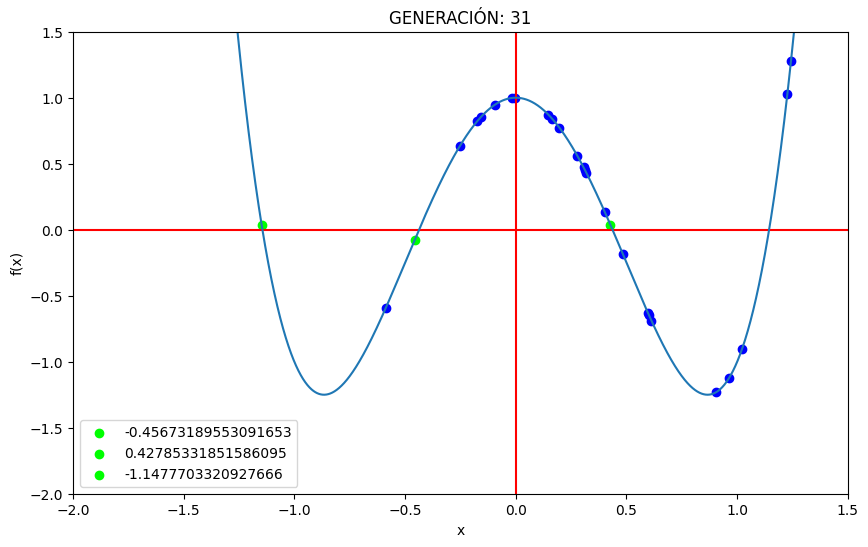

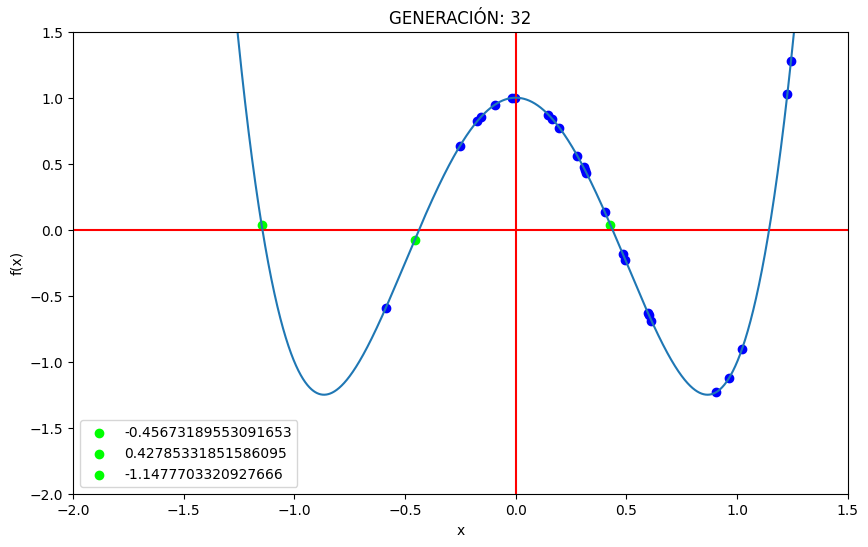

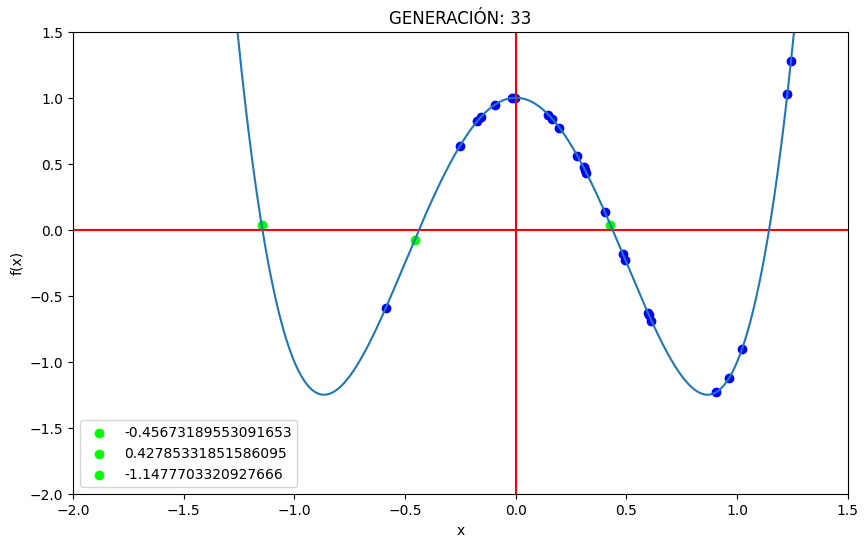

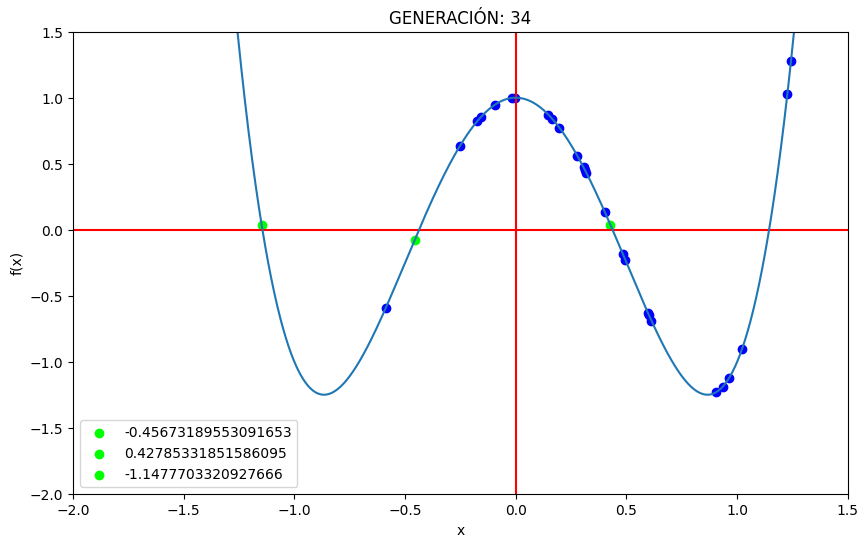

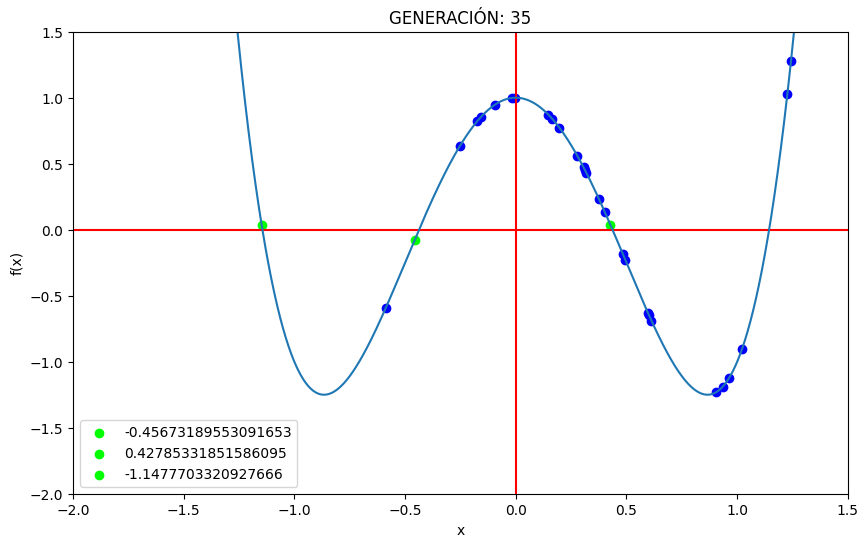

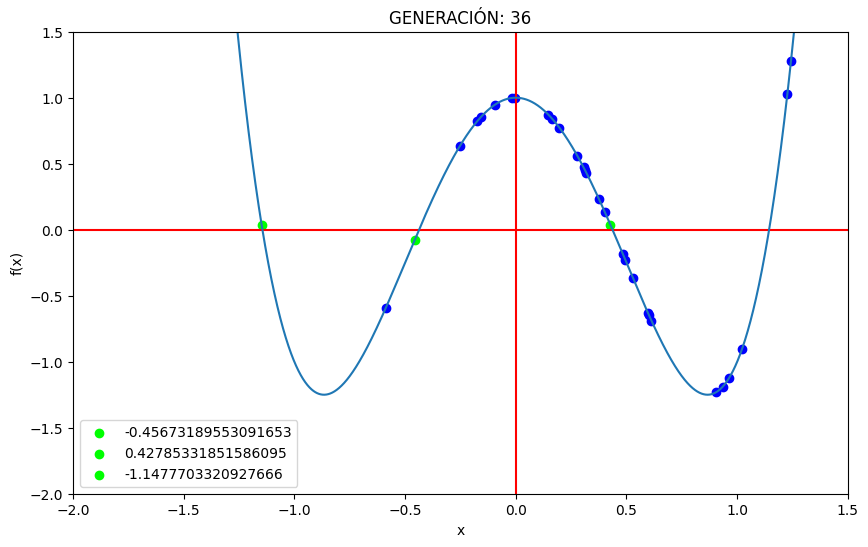

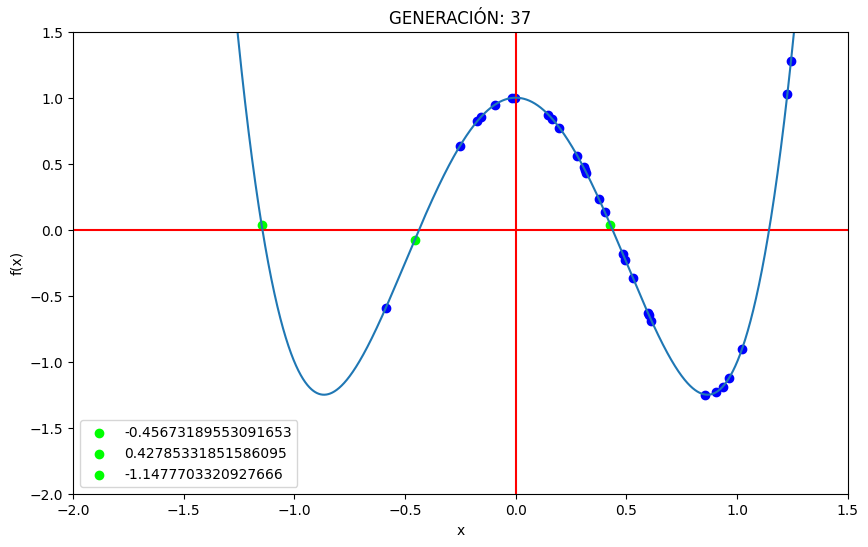

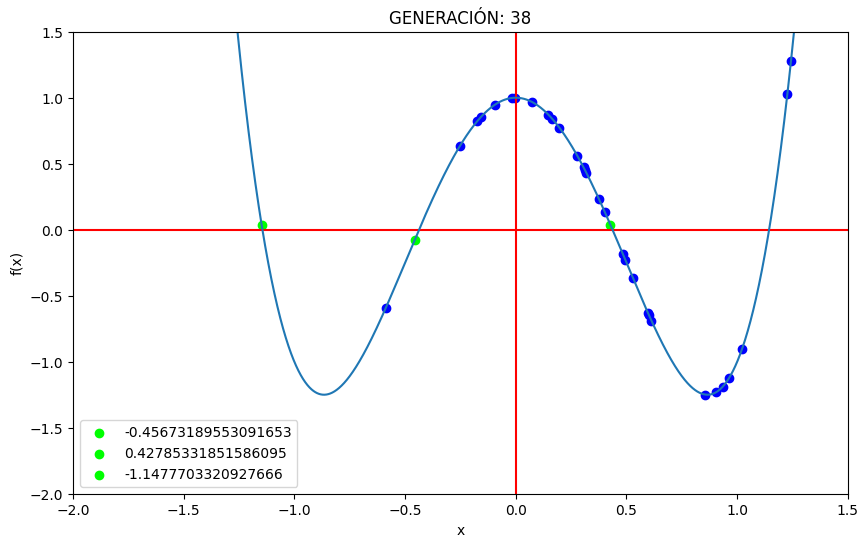

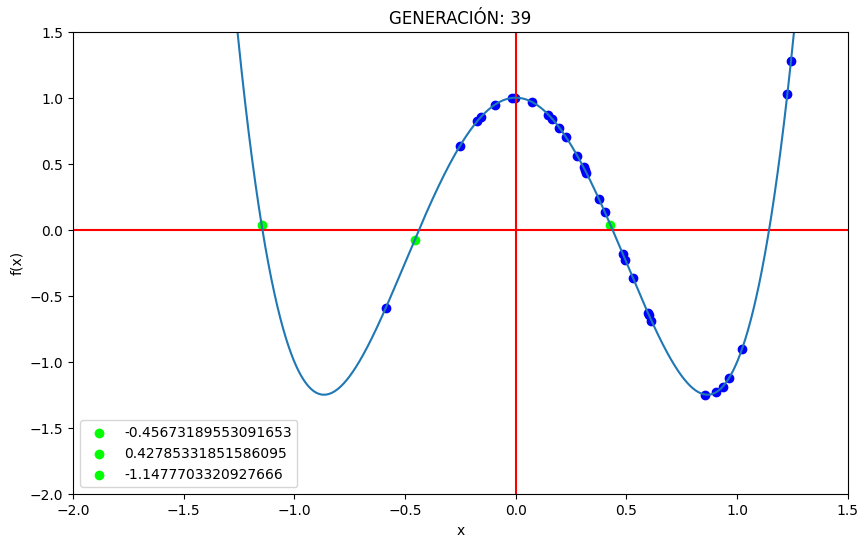

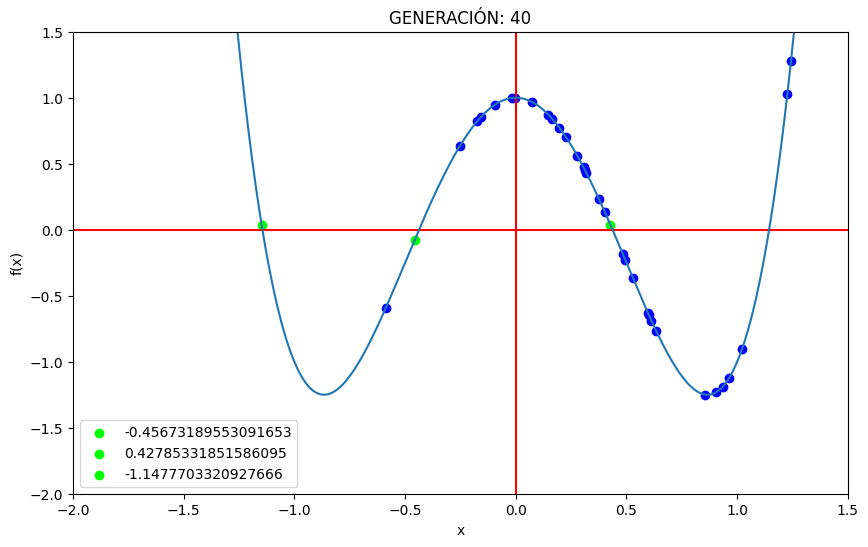

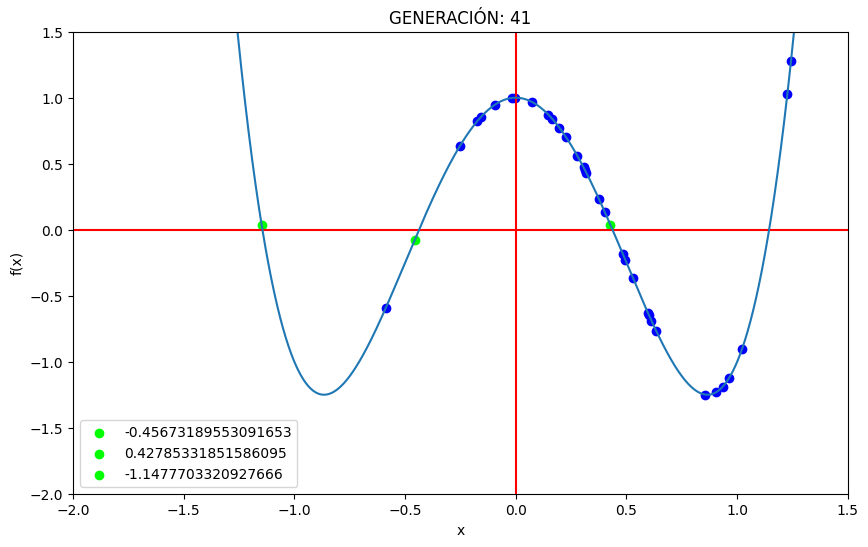

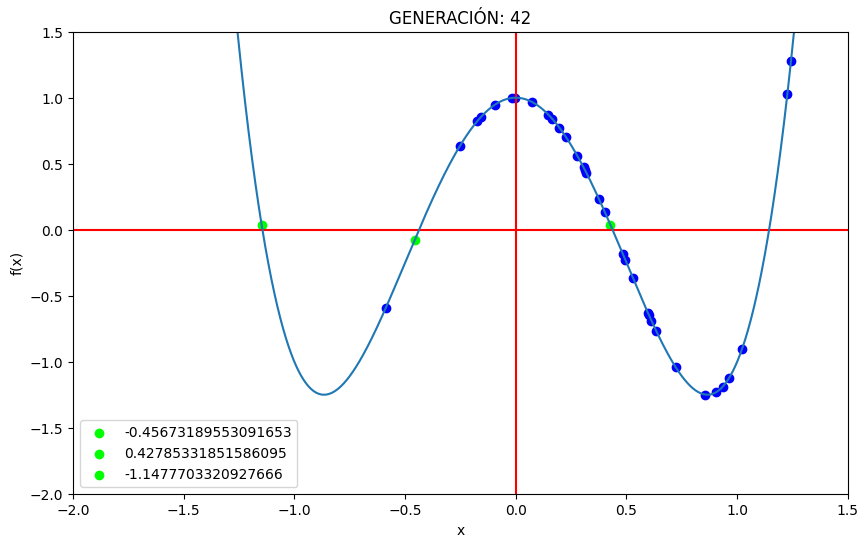

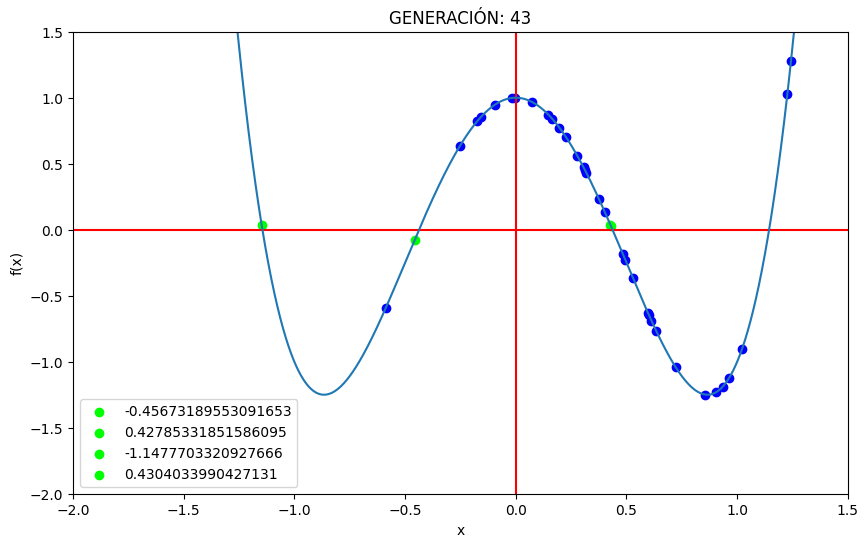

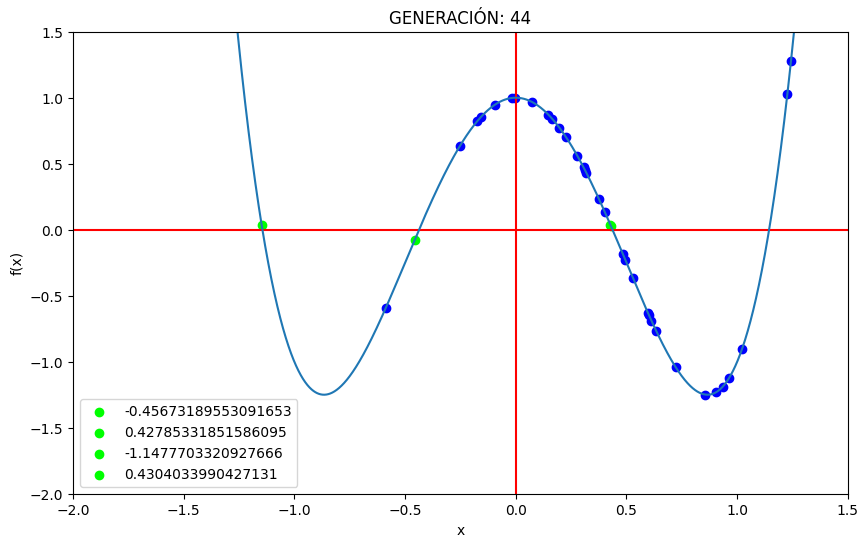

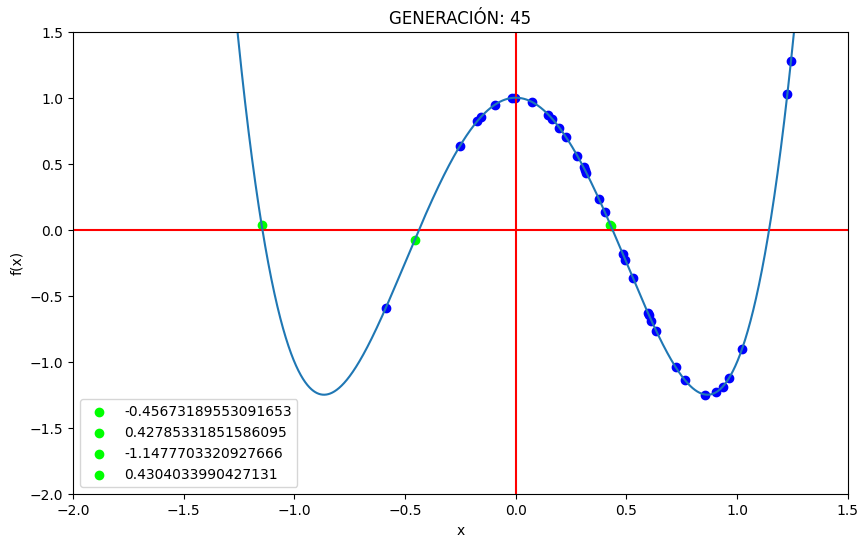

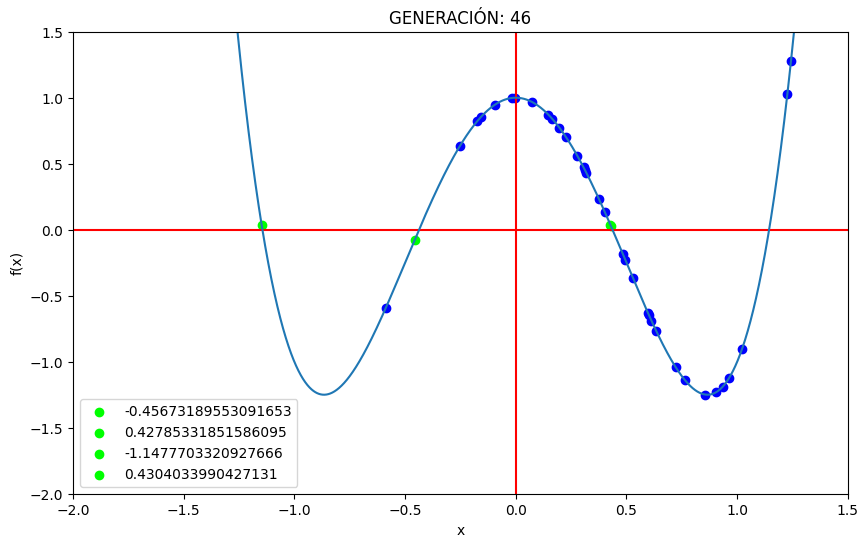

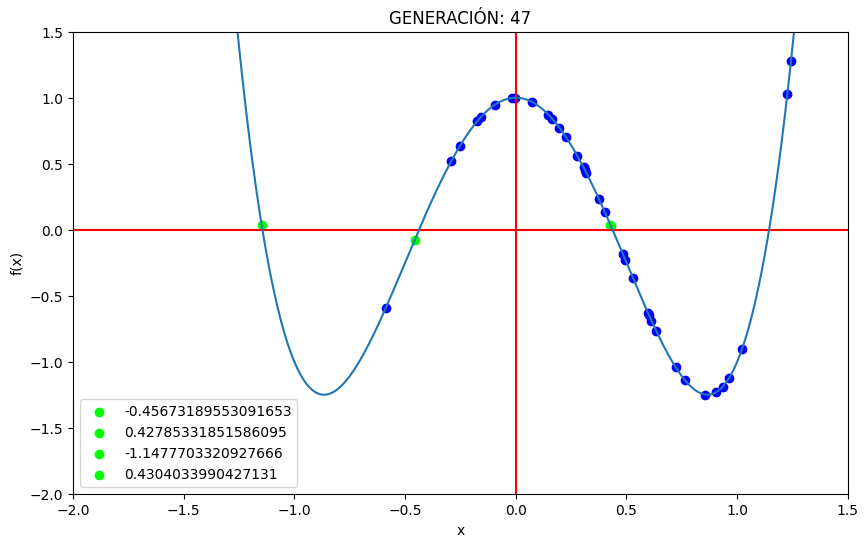

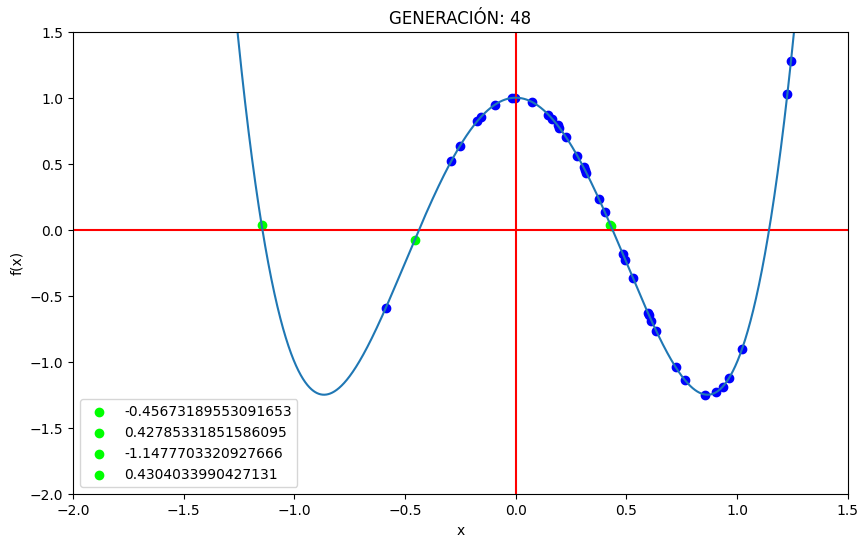

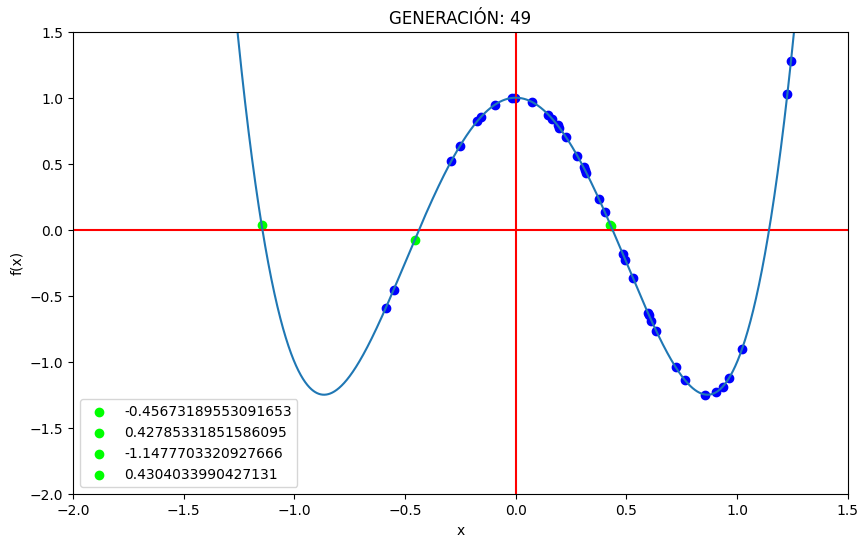

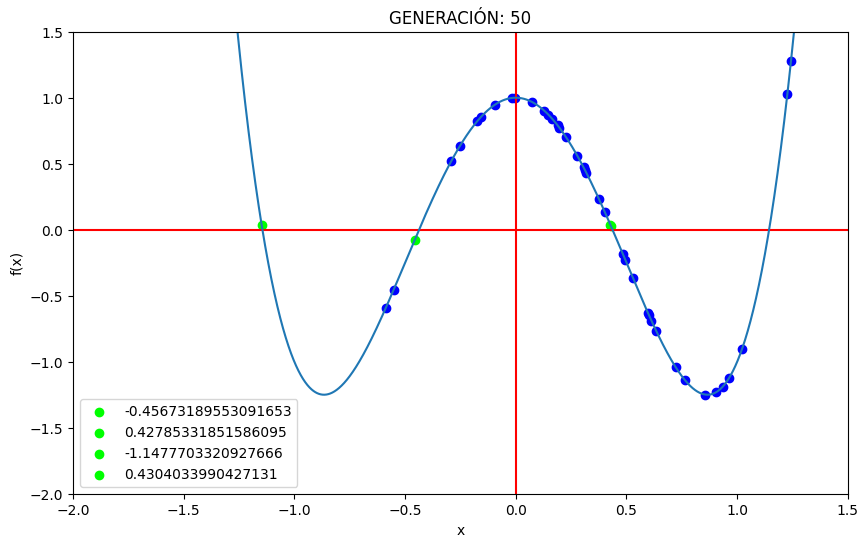

[-0.002248880625994376, 1.7589858510533956, -0.45673189553091653, 1.383623943870957, -0.2520564698953005, -0.587498160591865, 0.9047891249122761, 0.4834034712795995, -1.5998423169372902, 0.16529962713355983, 0.42785331851586095, 0.9637086463870976, 1.2431991458321179, 0.596826187743573, -0.09383817877177059, -0.15554417725804115, -0.1745455581650026, 0.3130637115644106, 0.4011641649723201, 0.14713662305040565, 0.6129032749036312, 0.2775600367615896, -0.016728328971892137, 0.19664780301369045, 1.226736122608468, 0.6008434769215594, -1.519698685693187, 1.0221460081389266, -1.1477703320927666, 0.3065435983000351, 0.3184296074504662, 0.494420743501385, -1.436046375528223, 0.9337668433046095, 0.37523833921719363, 0.5293495590497291, 0.8564249051992807, 0.07393865897184448, 0.2279832370720235, 0.6335389187479308, 1.6279825570478625, 0.7221410744833112, 0.4304033990427131, 1.281629039156079, 0.7624906077023508, 1.3474378327203864, -0.2911272666842635, 0.18888408296543346, -0.5515855167307262,

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def f(x):
  return 4*x**4-6*x**2+1

def seleccionar_padres_p(poblacion, dimension_torneo,proba): #Torneo probabilista y/o determinista
    torneo = random.sample(poblacion, dimension_torneo)
    if(random.random()<proba):
      return min(torneo, key=lambda ind: abs(f(ind)))
    else:
      return random.choice(torneo)

def generar_poblacion(lb,ub,tam_pob):
  return [np.random.uniform(lb,ub) for i in range(tam_pob)]

def Mating_pool(dim_mating_pool,pi,tam_torneo,proba_seleccion):
  mating_pool=[]
  for i in range(dim_mating_pool):
    padre=seleccionar_padres_p(pi,tam_torneo,proba_seleccion)
    mating_pool.append(padre)
  return mating_pool

def mutacion_gaussiana(ind,prob_mut):
  if(random.random()<prob_mut):
    return ind+np.random.uniform(0,1)
  return ind

def cruzar(padre1, padre2):
  return (padre1+padre2)/2
  #recombinación (promedio)

def graficar_poblacion(poblacion, iteracion, epsilon=0.1):
    x = np.linspace(lbg, ubg, 10000)
    y = f(x)
    plt.figure(figsize=(10, 6))
    plt.xlim(lbg, ubg)
    plt.ylim(lbg,ubg)
    plt.axhline(0, color='red', linestyle='-')
    plt.axvline(0, color='red', linestyle='-')

    for ind in poblacion:
      if abs(f(ind)) < epsilon:
          plt.scatter(ind, f(ind), color='lime', label=f"{ind}")
      else:
        plt.scatter(ind, f(ind), color='blue')

    plt.plot(x, y)
    plt.title(f'GENERACIÓN: {iteracion}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()


def AG_raices(lb,ub,tampob):
  pi=generar_poblacion(lb,ub,tampob)
  prob_sel=.5
  prob_mutacion=.5
  dim_mating_pool=500
  tam_torneo=2
  H=[]
  i=0

  while len(H)<tampob:
    mating_p=Mating_pool(dim_mating_pool,pi,tam_torneo,prob_sel)
    for _ in range(tampob):
      p1,p2=random.sample(mating_p,2)
      h=cruzar(p1,p2)
      h=mutacion_gaussiana(h,prob_mutacion)
      H.append(h)
      i+=1
      graficar_poblacion(H,i)
    pi=H
  return pi

lbg,ubg=-2,1.5
lb,ub=-2,2
tampob=50
mejores=[]
raices=AG_raices(lb,ub,tampob)
print(raices)
for ind in raices:
  if(abs(f(ind))<0.1):
    print(ind)
